In [77]:
from wordcloud import WordCloud, STOPWORDS
import pandas as pd
import numpy as np
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, auc, log_loss

In [78]:
df = pd.read_csv("./genshinNetwork/data/genshinReview.csv")


In [79]:
df.head()

,score,content
0,5,the game is great audio background etc are all...
1,4,the world building characters art design and g...
2,4,this game is fun but at the time that fontaine...
3,4,this game is beautiful and the game is very fu...
4,4,lost on furina banner but all together it is a...


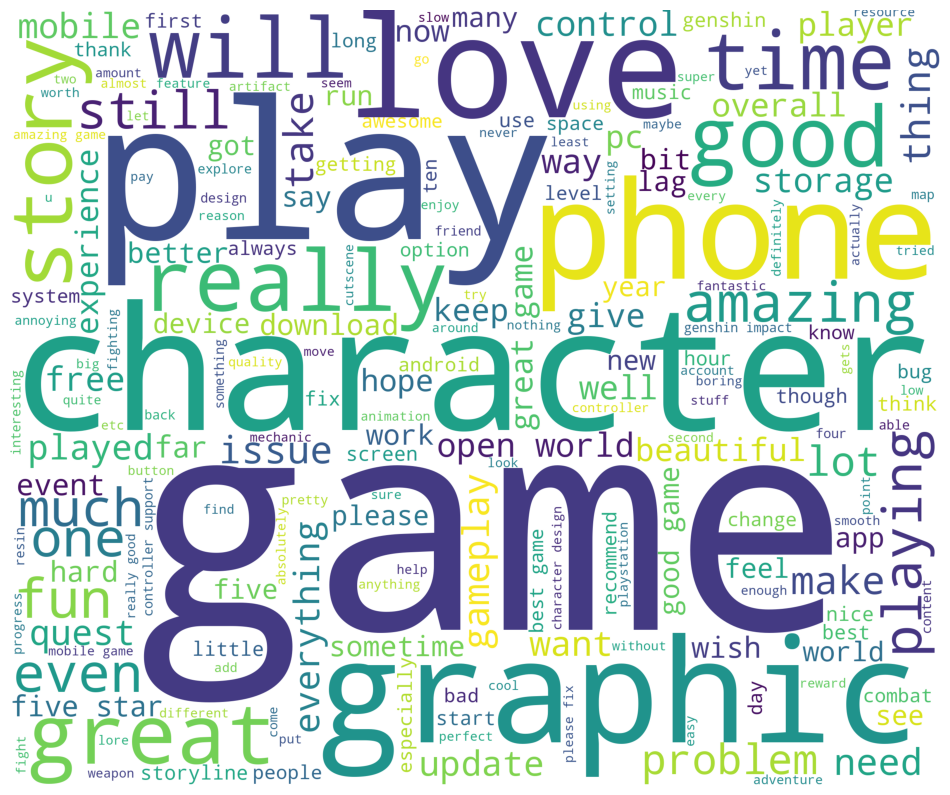

In [80]:
corpus_cloud = ' '.join(df['content'])
STOPWORDS.update(['PRON','would','also','’s'])
wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white',width=2400,height=2000).generate(corpus_cloud)
plt.figure(figsize=(12,15))
plt.imshow(wordcloud)
plt.axis('off')

# plt.savefig("wordcloud.jpg")
plt.show()

In [81]:
# CREATE DICTIONARY TO COUNT THE WORDS
count_dict_alex = {}

for doc in df['content']:
    for word in doc.split():
        if word in count_dict_alex.keys():
            count_dict_alex[word] +=1
        else:
            count_dict_alex[word] = 1
            
for key, value in sorted(count_dict_alex.items(), key=lambda item: item[1]):
    print("%s: %s" % (key, value))

sorted_dict = sorted(count_dict_alex.items(), key=lambda item: item[1])

# Specify the file name to write the output
output_file_path = 'word_count_output.txt'

# Open the file in write mode ('w') and write the content
with open(output_file_path, 'w') as output_file:
    for key, value in sorted_dict:
        output_file.write(f"{key}: {value}\n")

constellations: 1
lvling: 1
egregious: 1
appropriately: 1
compensated: 1
caliber: 1
interfere: 1
pleaseeeeee: 1
recorces: 1
proven: 1
sweet: 1
chef: 1
theorys: 1
lores: 1
gold: 1
ethier: 1
ache: 1
sm: 1
nostalgic: 1
remembered: 1
bursts: 1
cuss: 1
bitdo: 1
releasing: 1
chongyun: 1
sweaty: 1
efficenter: 1
remind: 1
rage: 1
equally: 1
bliss: 1
faded: 1
empathy: 1
gaacha: 1
utter: 1
thrive: 1
ultimate: 1
obligation: 1
ftp: 1
kaeyas: 1
shawty: 1
nahh: 1
adventurers: 1
explains: 1
equal: 1
comat: 1
breast: 1
waifu: 1
hame: 1
nearing: 1
exact: 1
merch: 1
cosplayer: 1
scream: 1
lungs: 1
suki: 1
reakky: 1
successfully: 1
icefield: 1
unaffordable: 1
beside: 1
theme: 1
identity: 1
crisis: 1
rhythm: 1
decoration: 1
dating: 1
fewer: 1
vary: 1
trigger: 1
backstorys: 1
seat: 1
dodging: 1
shielders: 1
intervals: 1
react: 1
targeting: 1
confusion: 1
placing: 1
whale: 1
fate: 1
reinvest: 1
fresh: 1
mary: 1
sue: 1
nord: 1
ce: 1
lite: 1
relax: 1
searched: 1
deficiency: 1
withstand: 1
condolences: 1
deduc

In [82]:
# REMOVE WORDS THAT OCCUR LESS THAN 10 TIMES
low_value = 10
bad_words = [key for key in count_dict_alex.keys() if count_dict_alex[key] < low_value]

In [83]:
# CREATE A LIST OF LISTS - EACH DOCUMENT IS A STRING BROKEN INTO A LIST OF WORDS
corpus = [doc.split() for doc in df['content']]
clean_list = []
for document in corpus:
    clean_list.append([word for word in document if word not in bad_words])

In [84]:
clean_list

[['the',
  'game',
  'is',
  'great',
  'audio',
  'background',
  'etc',
  'are',
  'all',
  'great',
  'but',
  'one',
  'thing',
  'i',
  'do',
  'not',
  'like',
  'is',
  'the',
  'wish',
  'system',
  'i',
  'do',
  'not',
  'have',
  'a',
  'five',
  'star',
  'character',
  'all',
  'i',
  'have',
  'got',
  'are',
  'four',
  'star',
  'character',
  'so',
  'it',
  'is',
  'to',
  'be',
  'a',
  'free',
  'to',
  'play',
  'unless',
  'you',
  'save',
  'a',
  'lot',
  'or',
  'primogems',
  'one',
  'good',
  'thing',
  'about',
  'it',
  'is',
  'you',
  'do',
  'not',
  'need',
  'a',
  'five',
  'star',
  'character',
  'to',
  'and',
  'enjoy',
  'the',
  'game',
  'though',
  'i',
  'do',
  'need',
  'the',
  'though',
  'as',
  'she',
  'can',
  'upgrade',
  'her',
  'with',
  'just',
  'up',
  'rank',
  'or',
  'the',
  'story',
  'progress',
  'it',
  'is',
  'hard',
  'to',
  'primogems',
  'i',
  'guess',
  'i',
  'better',
  'it',
  'up'],
 ['the',
  'world',
  'b

In [85]:
# USE CLEAN_LIST TO CREATE CORPUS
corpus=[]
for item in clean_list:
    item = ' '.join(item)
    corpus.append(item)
    
corpus

['the game is great audio background etc are all great but one thing i do not like is the wish system i do not have a five star character all i have got are four star character so it is to be a free to play unless you save a lot or primogems one good thing about it is you do not need a five star character to and enjoy the game though i do need the though as she can upgrade her with just up rank or the story progress it is hard to primogems i guess i better it up',
 'the world building characters art design and game play are fantastic and the best in the the gacha mechanics are a bit unfortunately i understand the developers to be for making a game of this but for characters is kind of a due to low drop rates that do with my of the game otherwise this is a five star experience',
 'this game is fun but at the time that fontaine was release my screen started to stop and now i cannot play anymore is there somehow any way to fix it i really wanna play i need help',
 'this game is beautiful 

In [86]:
import gensim
from gensim import corpora
from gensim.models import LdaModel, LdaMulticore
import gensim.downloader as api
from gensim.utils import simple_preprocess
from nltk.corpus import stopwords

In [87]:
clean_list[0][:15]

['the',
 'game',
 'is',
 'great',
 'audio',
 'background',
 'etc',
 'are',
 'all',
 'great',
 'but',
 'one',
 'thing',
 'i',
 'do']

In [88]:
# CREATE THE INPUTS OF LDA MODEL: DICTIONARY AND CORPUS
corpora_dict = corpora.Dictionary(clean_list)
corpus = [corpora_dict.doc2bow(line) for line in clean_list]

In [89]:
# TRAIN THE LDA MODEL
lda_model = LdaModel(corpus=corpus,
                         id2word=corpora_dict,
                         random_state=100,
                         num_topics=3,
                         passes=5,
                         per_word_topics=True)

# See the topics
lda_model.print_topics(-1)

[(0,
  '0.064*"the" + 0.040*"i" + 0.037*"and" + 0.034*"to" + 0.029*"game" + 0.022*"is" + 0.019*"it" + 0.014*"this" + 0.014*"you" + 0.013*"in"'),
 (1,
  '0.057*"the" + 0.050*"is" + 0.036*"it" + 0.035*"and" + 0.032*"a" + 0.029*"game" + 0.027*"to" + 0.026*"i" + 0.015*"of" + 0.013*"but"'),
 (2,
  '0.064*"i" + 0.044*"it" + 0.038*"the" + 0.026*"game" + 0.025*"and" + 0.023*"to" + 0.023*"but" + 0.020*"a" + 0.020*"my" + 0.018*"this"')]

In [90]:
from gensim.models.word2vec import Word2Vec
from multiprocessing import cpu_count
import gensim.downloader as api

In [91]:
# # Train Word2Vec model. Defaults result vector size = 100
# model = Word2Vec(clean_list, min_count = 0, workers=cpu_count())

# # Get the word vector for given word
# model['love']

# model.most_similar('love')


# Train Word2Vec model. Defaults result vector size = 100
model = Word2Vec(clean_list, min_count=0, workers=cpu_count())

# Get the word vector for a given word
vector = model.wv['love']

# Find words most similar to 'love'
similar_words = model.wv.most_similar('love')

print("Vector", vector)
print("Words similar to:", similar_words)


Vector [-0.15908282  0.20560859 -0.103985   -0.15126826 -0.15455055 -0.2431437
  0.5204047   0.38452846 -0.05828719 -0.39628902 -0.0329634  -0.05417973
 -0.29520315 -0.29116336  0.24562816  0.00415691  0.07005118 -0.5456787
 -0.2439808  -0.890175   -0.17360738  0.25271502  0.3161525   0.24386905
 -0.00696125 -0.05822903  0.07651108 -0.13684548 -0.3113874   0.2190482
  0.37793982 -0.24822928  0.11495547 -0.4615472   0.07119976  0.12152019
  0.03295163 -0.31636438  0.08567999 -0.10877501 -0.00316236 -0.54501253
 -0.5050846   0.05987275  0.40075207 -0.2495569  -0.02276387 -0.03667039
 -0.0158219   0.29364514  0.07126162 -0.28023243 -0.14164442  0.24903233
 -0.1680982   0.15441342  0.09702931 -0.17990796 -0.10012241  0.14204992
  0.08469611 -0.20224889  0.41744125  0.11147967 -0.4009075   0.51711667
 -0.0361849   0.4329924  -0.4947192   0.19430825  0.25334165  0.5983792
  0.3461699  -0.16204457  0.2753703   0.17887644 -0.12434311  0.10879727
 -0.03887819 -0.0562687   0.00161699 -0.0314629 

In [92]:
dct = corpora.Dictionary(clean_list)
corpus = [dct.doc2bow(line) for line in clean_list]

# Build the bigram models
bigram = gensim.models.phrases.Phrases(clean_list, min_count=3, threshold=10)

# Construct bigram
print(bigram[clean_list[1]])

['the', 'world_building', 'characters', 'art', 'design', 'and', 'game', 'play', 'are', 'fantastic', 'and', 'the', 'best', 'in', 'the', 'the', 'gacha', 'mechanics', 'are', 'a_bit', 'unfortunately', 'i', 'understand', 'the', 'developers', 'to', 'be', 'for', 'making', 'a', 'game', 'of', 'this', 'but', 'for', 'characters', 'is', 'kind_of', 'a', 'due', 'to', 'low', 'drop_rates', 'that', 'do', 'with', 'my', 'of', 'the', 'game', 'otherwise', 'this', 'is', 'a', 'five_star', 'experience']


In [93]:
analyser = SentimentIntensityAnalyzer()

In [94]:
def sentimentScore(sentences):
    analyzer = SentimentIntensityAnalyzer()
    results = []
    for sentence in sentences:
        vs = analyzer.polarity_scores(sentence)
        print(str(vs))
        results.append(vs) 
    return results

In [95]:
sentiment = sentimentScore(df['content'])


{'neg': 0.085, 'neu': 0.648, 'pos': 0.266, 'compound': 0.9808}
{'neg': 0.083, 'neu': 0.781, 'pos': 0.136, 'compound': 0.6705}
{'neg': 0.11, 'neu': 0.7, 'pos': 0.19, 'compound': 0.5945}
{'neg': 0.181, 'neu': 0.669, 'pos': 0.151, 'compound': -0.5124}
{'neg': 0.071, 'neu': 0.603, 'pos': 0.325, 'compound': 0.7845}
{'neg': 0.16, 'neu': 0.738, 'pos': 0.102, 'compound': -0.351}
{'neg': 0.133, 'neu': 0.668, 'pos': 0.2, 'compound': 0.5873}
{'neg': 0.0, 'neu': 0.734, 'pos': 0.266, 'compound': 0.9259}
{'neg': 0.036, 'neu': 0.964, 'pos': 0.0, 'compound': -0.0286}
{'neg': 0.0, 'neu': 0.899, 'pos': 0.101, 'compound': 0.2263}
{'neg': 0.04, 'neu': 0.752, 'pos': 0.208, 'compound': 0.9215}
{'neg': 0.025, 'neu': 0.57, 'pos': 0.405, 'compound': 0.9694}
{'neg': 0.062, 'neu': 0.647, 'pos': 0.291, 'compound': 0.8016}
{'neg': 0.032, 'neu': 0.659, 'pos': 0.309, 'compound': 0.9891}
{'neg': 0.122, 'neu': 0.776, 'pos': 0.101, 'compound': -0.2273}
{'neg': 0.0, 'neu': 0.93, 'pos': 0.07, 'compound': 0.2023}
{'neg': 

In [96]:
sentiment_df = pd.DataFrame(sentiment)
sentiment_df.head()

,neg,neu,pos,compound
0,0.085,0.648,0.266,0.9808
1,0.083,0.781,0.136,0.6705
2,0.110,0.700,0.190,0.5945
3,0.181,0.669,0.151,-0.5124
4,0.071,0.603,0.325,0.7845


In [109]:
# align index to copy rating column for joining
df.index = sentiment_df.index
sentiment_df['score'] = df['score']
echo_vader = pd.concat([df, sentiment_df], axis=1)
echo_vader.head()

,score,content,neg,neu,pos,compound,score
0,5,the game is great audio background etc are all...,0.085,0.648,0.266,0.9808,5
1,4,the world building characters art design and g...,0.083,0.781,0.136,0.6705,4
2,4,this game is fun but at the time that fontaine...,0.110,0.700,0.190,0.5945,4
3,4,this game is beautiful and the game is very fu...,0.181,0.669,0.151,-0.5124,4
4,4,lost on furina banner but all together it is a...,0.071,0.603,0.325,0.7845,4


In [114]:
neg_sentiment = df[echo_vader['compound'] < 0]
pos_sentiment = df[echo_vader['compound'] > 0]

In [115]:
from sklearn.feature_selection import chi2

tfidf_n = TfidfVectorizer(ngram_range=(2, 2))
X_tfidf_n = tfidf_n.fit_transform(neg_sentiment['content'])
y_n = neg_sentiment['score']
chi2score_n = chi2(X_tfidf_n, y_n)[0]

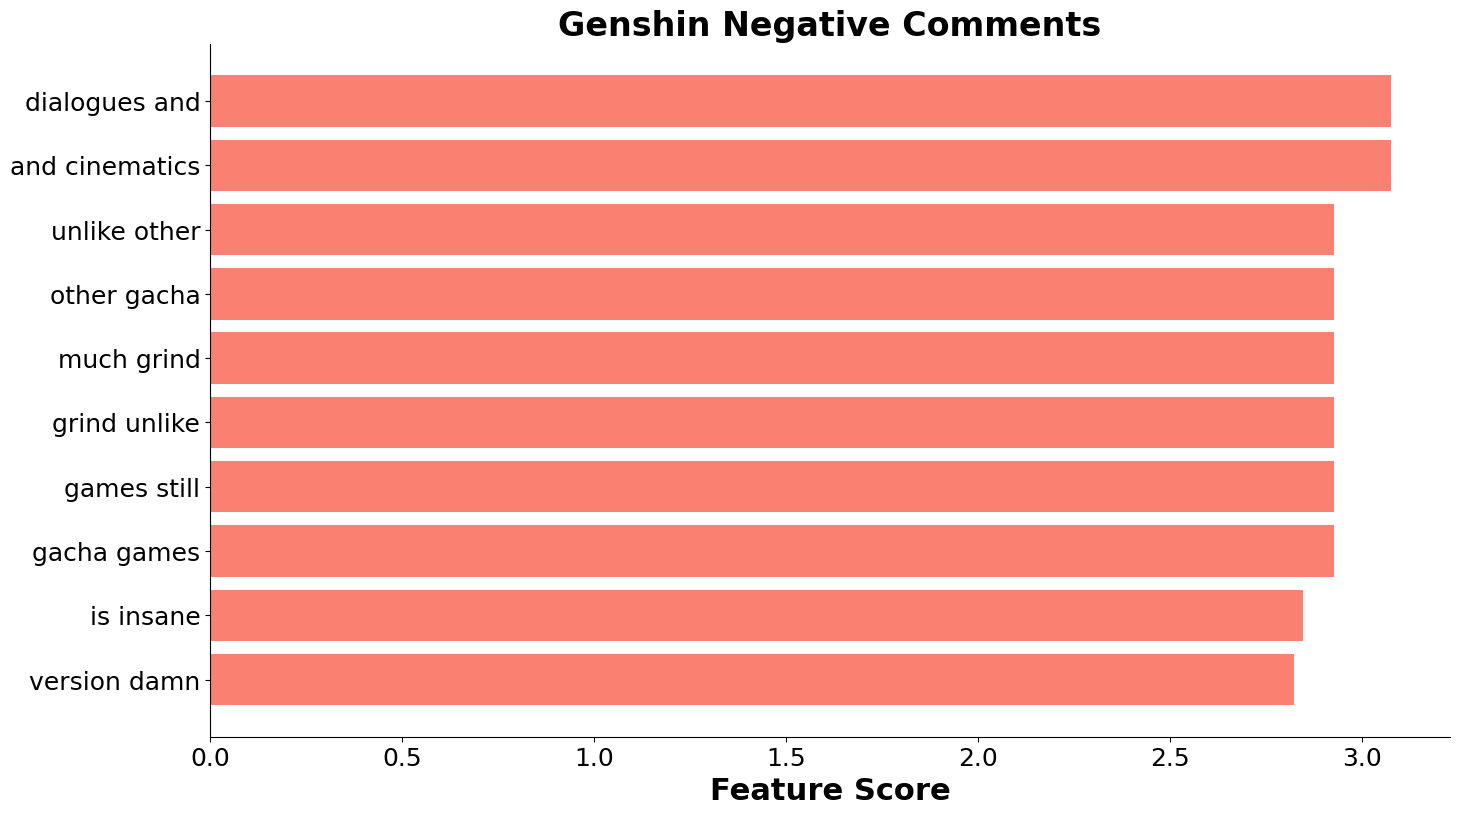

<Figure size 640x480 with 0 Axes>

In [116]:
feature_names = tfidf_n.get_feature_names_out()
scores = list(zip(feature_names, chi2score_n))
chi2_n = sorted(scores, key=lambda x: x[1])
topchi2_n = list(zip(*chi2_n[-10:]))
x_n=range(len(topchi2_n[1]))

fig, ax = plt.subplots(figsize=(16,9))
ax.barh(x_n, topchi2_n[1], align='center', alpha=1, color='salmon')

plt.title('Genshin Negative Comments', fontsize=24, weight='bold')

# x-axis
plt.xlabel("Feature Score", fontsize=22, weight='bold')
plt.xticks(fontsize=18)

#y-axis
labels = topchi2_n[0]
plt.yticks(x_n, labels, fontsize=18)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)

fig = plt.gcf()
plt.show()
plt.draw()

# fig.savefig('negative.jpg')

In [118]:
tfidf = TfidfVectorizer(ngram_range=(2, 2))
X_tfidf = tfidf.fit_transform(pos_sentiment['content'])
y = pos_sentiment['score']
chi2score = chi2(X_tfidf, y)[0]

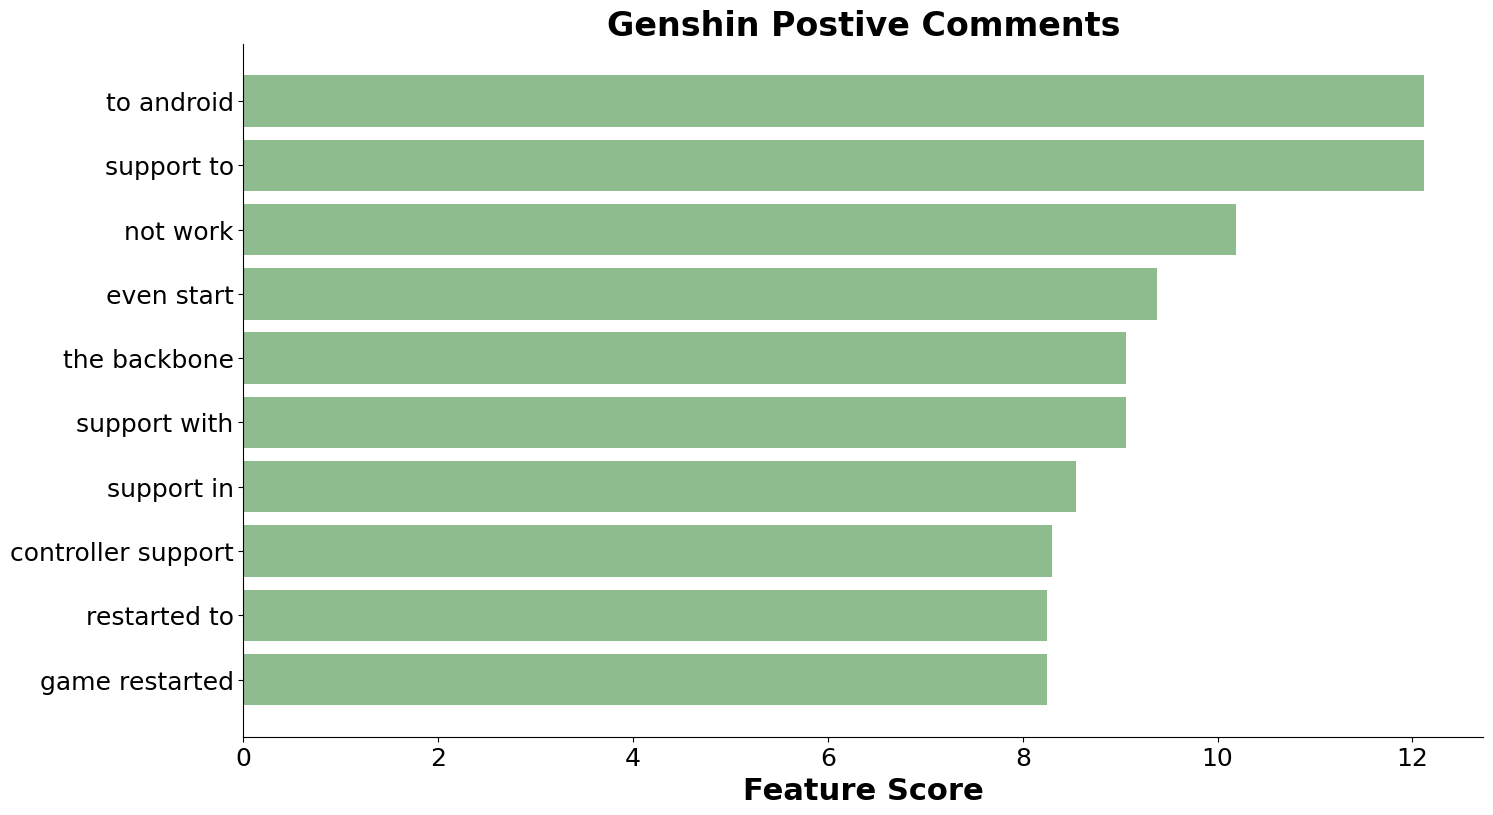

<Figure size 640x480 with 0 Axes>

In [119]:
feature_names = tfidf.get_feature_names_out()
scores = list(zip(feature_names, chi2score))
chi2 = sorted(scores, key=lambda x: x[1])
topchi2 = list(zip(*chi2[-10:]))
x = range(len(topchi2[1]))

fig, ax = plt.subplots(figsize=(16,9))
ax.barh(x,topchi2[1], alpha=1, color='darkseagreen')

plt.title('Genshin Postive Comments', fontsize=24, weight='bold')

# x-axis
plt.xlabel("Feature Score", fontsize=22, weight='bold')
plt.xticks(fontsize=18)

#y-axis
labels = topchi2[0]
plt.yticks(x, labels, fontsize=18)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)

fig = plt.gcf()
plt.show()
plt.draw()

# fig.savefig('positive.jpg')